In [1]:
import tensorflow as tf

In [2]:
arr = [0.4, 2.0, 0.001, 0.32]
resultado = tf.convert_to_tensor(arr)
resultado

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([4.0e-01, 2.0e+00, 1.0e-03, 3.2e-01], dtype=float32)>

In [5]:
print("Resultado de softmax: ", tf.nn.softmax(resultado).numpy())

Resultado de softmax:  [0.13250053 0.65627944 0.08890663 0.12231341]


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt

In [9]:
# Leer datos
df = pd.read_csv('data_boston.csv', header='infer', encoding='latin1')
df = df[['PRICE']]

# Escalar datos
scaler = MinMaxScaler()
ts_scaled = scaler.fit_transform(df)

In [ ]:
# Preparar datos para la RNN
ts_scaled = ts_scaled.reshape(-1, 1, 1)


In [12]:
# Parámetros de entrenamiento
batch_size = 1
n_epochs = 1000
learn_rate = 0.0001

In [15]:
# Definir el modelo
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(50, input_shape=(None, 1), return_sequences=False))
model.add(tf.keras.layers.Dense(1))
model

c:\Users\crist\Documents\Samsung-Innovation-Campus\env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<Sequential name=sequential_2, built=True>

In [ ]:
# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learn_rate), loss='mean_squared_error')

In [ ]:
# Entrenar el modelo
history = model.fit(ts_scaled, ts_scaled, batch_size=batch_size, epochs=n_epochs, verbose=1)

Epoch 1/1000
506/506 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2169
Epoch 2/1000
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0314
Epoch 3/1000
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0200
Epoch 4/1000
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0137
Epoch 5/1000
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0093
Epoch 6/1000
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0054
Epoch 7/1000
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0023
Epoch 8/1000
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0011
Epoch 9/1000
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4310e-04
Epoch 10/1000
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2270e-04
Epoch 11/1000
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1136e-05
Epoch 12/1000
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.3977e-06
Epoch 13/1000
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.1885e-06
Epoch 14/1000
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.7536e-06
Epoch

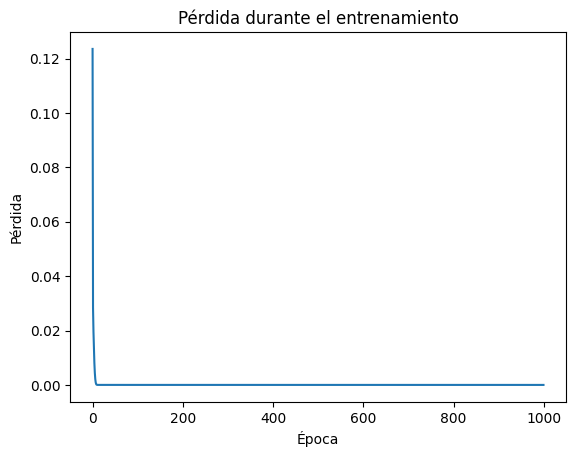

In [25]:
plt.plot(history.history['loss'])
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

In [19]:
# Predicción
predicted = model.predict(ts_scaled)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [21]:
# Invertir la escala para obtener los valores originales
predicted = scaler.inverse_transform(predicted)

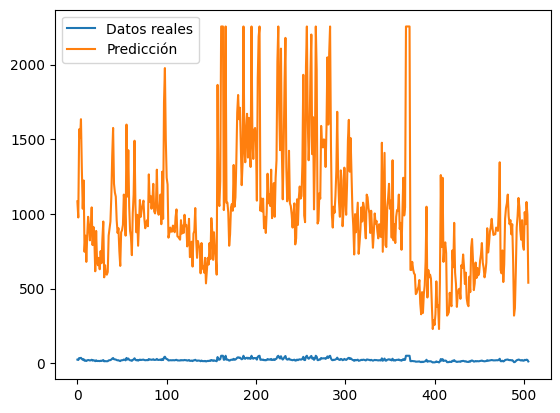

In [22]:
# Visualizar los resultados
plt.plot(df['PRICE'], label='Datos reales')
plt.plot(predicted, label='Predicción')
plt.legend()
plt.show()